In [3]:
import cv2          
import numpy as np     
  
# path to input image is specified and 
# image is loaded with imread command 
image1 = cv2.imread('1.jpg') 
  
# cv2.cvtColor is applied over the 
# image input with applied parameters 
# to convert the image in grayscale 
img = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY) 
  
# applying Otsu thresholding 
# as an extra flag in binary  
# thresholding      
ret, thresh1 = cv2.threshold(img, 120, 255, cv2.THRESH_BINARY + 
                                            cv2.THRESH_OTSU)      
  
# the window showing output image          
# with the corresponding thresholding          
# techniques applied to the input image     
cv2.imshow('Otsu Threshold', thresh1)          
       
# De-allocate any associated memory usage          
if cv2.waitKey(0) & 0xff == 27: 
    cv2.destroyAllWindows()

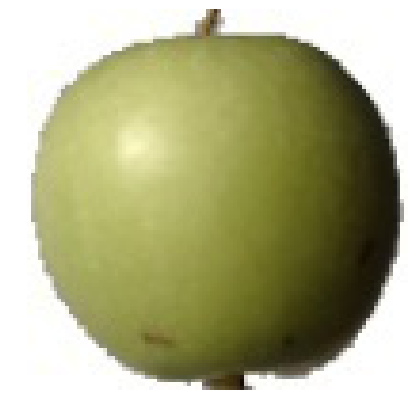

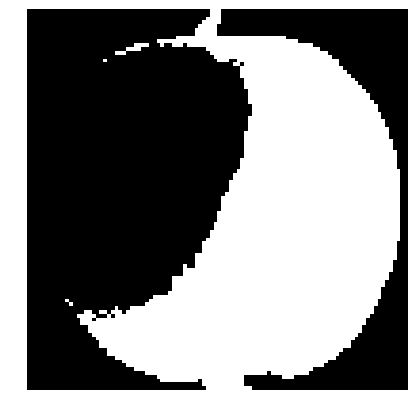

In [8]:
import numpy as np
import imageio
import matplotlib.pyplot as plt

pic = imageio.imread('20.jpg')
plt.figure(figsize=(7,7))
plt.axis('off')
plt.imshow(pic);

def otsu_threshold(im):

    # Compute histogram and probabilities of each intensity level
    pixel_counts = [np.sum(im == i) for i in range(256)]

    # Initialization
    s_max = (0,0)
    
    for threshold in range(256):

        # update
        w_0 = sum(pixel_counts[:threshold])
        w_1 = sum(pixel_counts[threshold:])

        mu_0 = sum([i * pixel_counts[i] for i in range(0,threshold)]) / w_0 if w_0 > 0 else 0       
        mu_1 = sum([i * pixel_counts[i] for i in range(threshold, 256)]) / w_1 if w_1 > 0 else 0

        # calculate - inter class variance
        s = w_0 * w_1 * (mu_0 - mu_1) ** 2

        if s > s_max[1]:
            s_max = (threshold, s) 
    return s_max[0]

def threshold(pic, threshold):
    return ((pic > threshold) * 255).astype('uint8')

gray = lambda rgb : np.dot(rgb[... , :3] , [0.21 , 0.72, 0.07]) 

plt.figure(figsize=(7,7))
plt.imshow(threshold(gray(pic), otsu_threshold(pic)), cmap='Greys')
plt.axis('off');

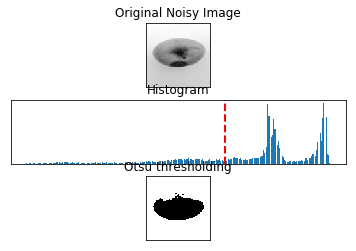

In [5]:
# import numpy as np
# from matplotlib import pyplot as plt
 
# img = cv2.imread('1.jpg',0)
 
# #ret1, th1 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
 
# ret, imgf = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
 
# #blur = cv2.GaussianBlur(img, (5,5), 0)
# #ret3, th3 = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
 
# plt.subplot(3,1,1), plt.imshow(img,cmap = 'gray')
# plt.title('Original Noisy Image'), plt.xticks([]), plt.yticks([])
# plt.subplot(3,1,2), plt.hist(img.ravel(), 256)
# plt.axvline(x=ret, color='r', linestyle='dashed', linewidth=2)
# plt.title('Histogram'), plt.xticks([]), plt.yticks([])
# plt.subplot(3,1,3), plt.imshow(imgf,cmap = 'gray')
# plt.title('Otsu thresholding'), plt.xticks([]), plt.yticks([])
# plt.show()


import cv2
import numpy as np
from matplotlib import pyplot as plt
 
img = cv2.imread('1.jpg',0)
 
ret, imgf = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
 
plt.subplot(3,1,1), plt.imshow(img,cmap = 'gray')
plt.title('Original Noisy Image'), plt.xticks([]), plt.yticks([])
plt.subplot(3,1,2), plt.hist(img.ravel(), 256)
plt.axvline(x=ret, color='r', linestyle='dashed', linewidth=2)
plt.title('Histogram'), plt.xticks([]), plt.yticks([])
plt.subplot(3,1,3), plt.imshow(imgf,cmap = 'gray')
plt.title('Otsu thresholding'), plt.xticks([]), plt.yticks([])
plt.show()